In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [29]:
file_path = '../data/raw/PUBLIC_PREDISPATCHIS_202508121400_20250812133340.CSV'

In [ ]:
df = pd.read_csv(file_path ,on_bad_lines='skip' )

/var/folders/hd/c7cd4bd530l8x34l7q7fw3_m0000gn/T/ipykernel_5274/487919106.py:1: DtypeWarning: Columns (4,5,7,8,9,10,11,14,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/PUBLIC_PREDISPATCHIS_202508121400_20250812133340.CSV',on_bad_lines='skip' )


In [27]:
# It shows that there is an irregularity in the data, So we need to check the first rows
# Preview the first 5 lines of a CSV file before loading with pandas
with open('../data/raw/PUBLIC_PREDISPATCHIS_202508121400_20250812133340.CSV', 'r') as f:
    for _ in range(5):
        print(f.readline().strip())

C,NEMP.WORLD,PREDISPATCHIS,AEMO,PUBLIC,2025/08/12,13:33:40,0000000476010282,PREDISPATCHIS,0000000476010277
I,PREDISPATCH,CASE_SOLUTION,1,PREDISPATCHSEQNO,RUNNO,SOLUTIONSTATUS,SPDVERSION,NONPHYSICALLOSSES,TOTALOBJECTIVE,TOTALAREAGENVIOLATION,TOTALINTERCONNECTORVIOLATION,TOTALGENERICVIOLATION,TOTALRAMPRATEVIOLATION,TOTALUNITMWCAPACITYVIOLATION,TOTAL5MINVIOLATION,TOTALREGVIOLATION,TOTAL6SECVIOLATION,TOTAL60SECVIOLATION,TOTALASPROFILEVIOLATION,TOTALENERGYCONSTRVIOLATION,TOTALENERGYOFFERVIOLATION,LASTCHANGED,INTERVENTION
D,PREDISPATCH,CASE_SOLUTION,1,2025081220,1,1,,0,6052794332.5330,0,0,104.355,0,791.853,,,,,0,0,0,"2025/08/12 13:32:19",0
I,PREDISPATCH,LOCAL_PRICE,1,PREDISPATCHSEQNO,DATETIME,DUID,PERIODID,LOCAL_PRICE_ADJUSTMENT,LOCALLY_CONSTRAINED,LASTCHANGED
D,PREDISPATCH,LOCAL_PRICE,1,2025081220,"2025/08/13 10:30:00",ARWF1,42,-46.53,2,"2025/08/12 13:32:19"


In [63]:
# So, the first three rows hold global info, the forth row is the header, and the rest are data rows.
# We can skip the first three rows and set the forth row as the header.
df = pd.read_csv(file_path, skiprows=3, header=0, on_bad_lines='skip')
print (df.columns)
df.head(5)


Index(['I', 'PREDISPATCH', 'LOCAL_PRICE', '1', 'PREDISPATCHSEQNO', 'DATETIME',
       'DUID', 'PERIODID', 'LOCAL_PRICE_ADJUSTMENT', 'LOCALLY_CONSTRAINED',
       'LASTCHANGED'],
      dtype='object')


,I,PREDISPATCH,LOCAL_PRICE,1,PREDISPATCHSEQNO,DATETIME,DUID,PERIODID,LOCAL_PRICE_ADJUSTMENT,LOCALLY_CONSTRAINED,LASTCHANGED
0,D,PREDISPATCH,LOCAL_PRICE,1.0,2.025081e+09,2025/08/13 10:30:00,ARWF1,42.0,-46.53,2.0,2025/08/12 13:32:19
1,D,PREDISPATCH,LOCAL_PRICE,1.0,2.025081e+09,2025/08/13 11:00:00,ARWF1,43.0,-28.50,2.0,2025/08/12 13:32:19
2,D,PREDISPATCH,LOCAL_PRICE,1.0,2.025081e+09,2025/08/13 11:30:00,ARWF1,44.0,-23.99,2.0,2025/08/12 13:32:19
3,D,PREDISPATCH,LOCAL_PRICE,1.0,2.025081e+09,2025/08/13 12:00:00,ARWF1,45.0,-5.98,2.0,2025/08/12 13:32:19
4,D,PREDISPATCH,LOCAL_PRICE,1.0,2.025081e+09,2025/08/12 14:00:00,BANGOWF1,1.0,-106.44,2.0,2025/08/12 13:32:19


In [39]:
df.describe(include='all')

,I,PREDISPATCH,LOCAL_PRICE,1,PREDISPATCHSEQNO,DATETIME,DUID,PERIODID,LOCAL_PRICE_ADJUSTMENT,LOCALLY_CONSTRAINED,LASTCHANGED
count,1980,1980,1980,1979.0,1.979000e+03,1979,1979,1979.000000,1979.000000,1979.000000,1979
unique,2,2,2,NaN,NaN,60,93,NaN,NaN,NaN,1
top,D,PREDISPATCH,LOCAL_PRICE,NaN,NaN,2025/08/12 14:00:00,BROKENH1,NaN,NaN,NaN,2025/08/12 13:32:19
freq,1979,1979,1979,NaN,NaN,57,59,NaN,NaN,NaN,1979
mean,NaN,NaN,NaN,1.0,2.025081e+09,NaN,NaN,36.635675,79.564578,1.941385,NaN
std,NaN,NaN,NaN,0.0,0.000000e+00,NaN,NaN,24.518872,196.049642,0.234963,NaN
min,NaN,NaN,NaN,1.0,2.025081e+09,NaN,NaN,1.000000,-1116.930000,1.000000,NaN
25%,NaN,NaN,NaN,1.0,2.025081e+09,NaN,NaN,16.000000,4.770000,2.000000,NaN
50%,NaN,NaN,NaN,1.0,2.025081e+09,NaN,NaN,32.000000,41.430000,2.000000,NaN
75%,NaN,NaN,NaN,1.0,2.025081e+09,NaN,NaN,62.000000,127.990000,2.000000,NaN


In [41]:
df.dtypes

I                          object
PREDISPATCH                object
LOCAL_PRICE                object
1                         float64
PREDISPATCHSEQNO          float64
DATETIME                   object
DUID                       object
PERIODID                  float64
LOCAL_PRICE_ADJUSTMENT    float64
LOCALLY_CONSTRAINED       float64
LASTCHANGED                object
dtype: object

In [42]:
# List columns where all values are the same
constant_cols = [col for col in df.columns if df[col].nunique(dropna=False) == 1]
print("Columns with all identical values:", constant_cols)

Columns with all identical values: []


In [45]:
for col in [ 'I', 'PREDISPATCH', 'LOCAL_PRICE', '1', 'LASTCHANGED']:
    # Print unique values of a column
    print(df[col].unique())

['D' 'C']
['PREDISPATCH' 'END OF REPORT']
['LOCAL_PRICE' '65557']
[ 1. nan]
['2025/08/12 13:32:19' nan]


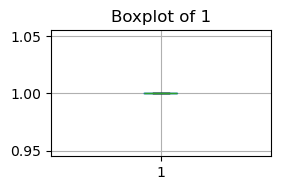

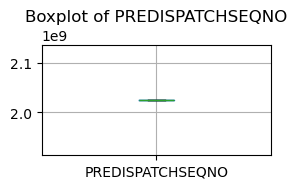

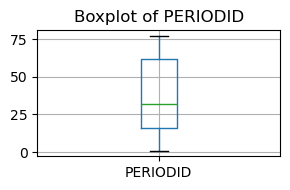

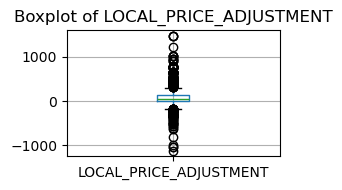

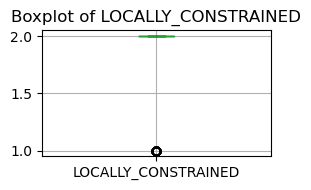

In [ ]:

for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(3, 2))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

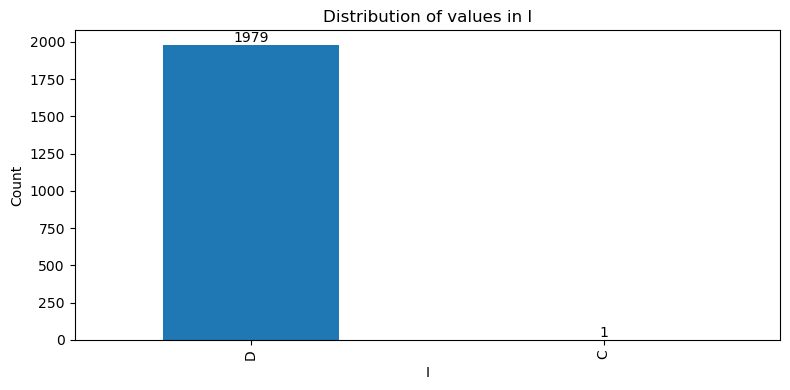

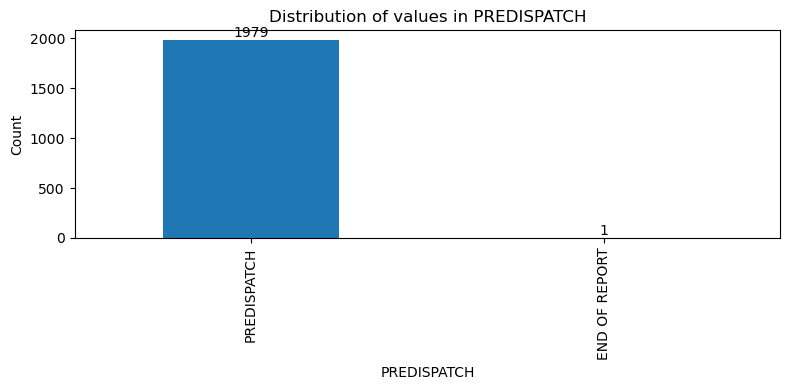

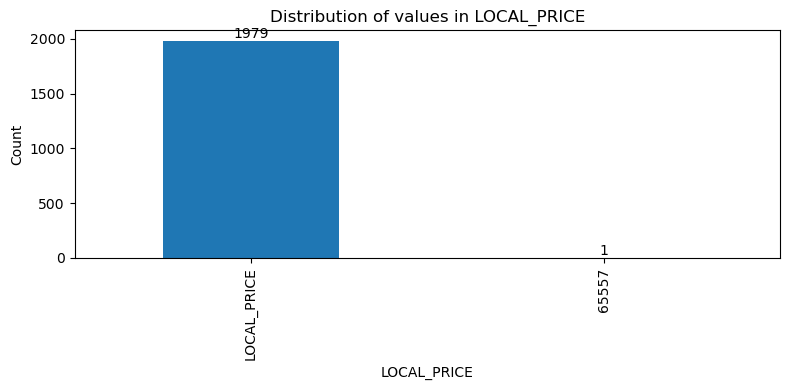

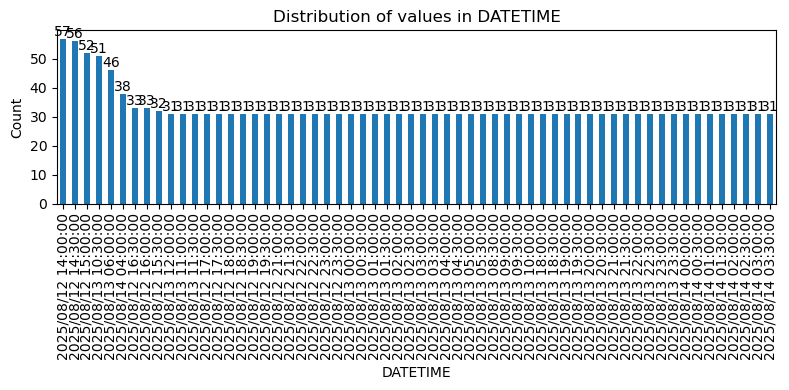

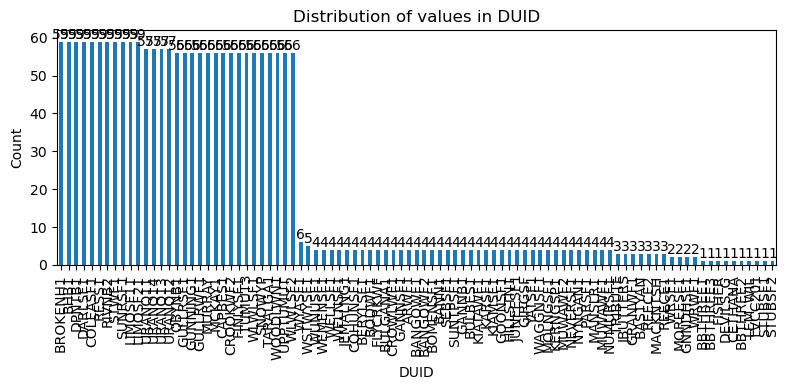

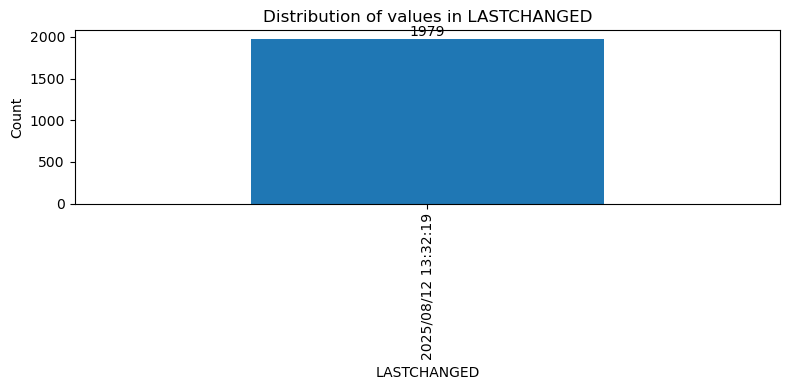

In [ ]:
# Plot the distribution of values for a non-numeric column (as a bar chart)
for col in df.select_dtypes(include=['object']).columns:
    value_counts = df[col].value_counts()
    ax = value_counts.plot(kind='bar', figsize=(8, 4))
    plt.title(f'Distribution of values in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Annotate each bar with its count
    for i, count in enumerate(value_counts):
        ax.text(i, count, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

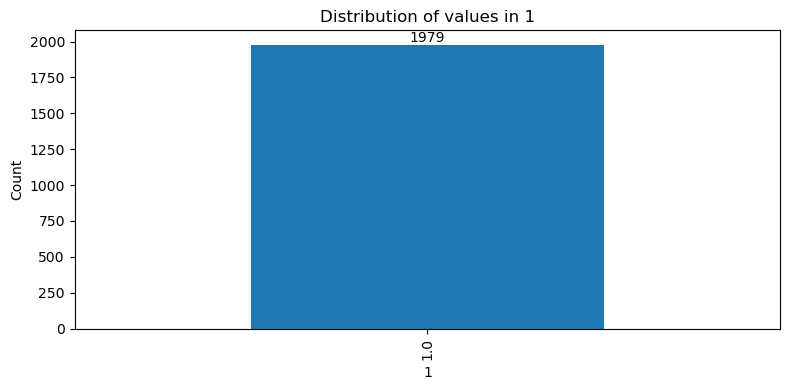

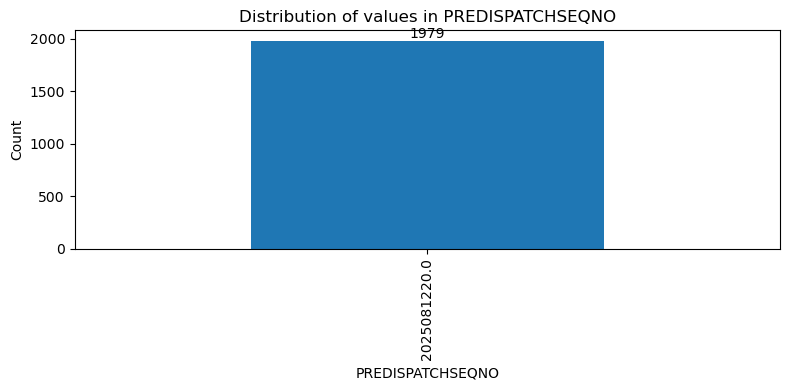

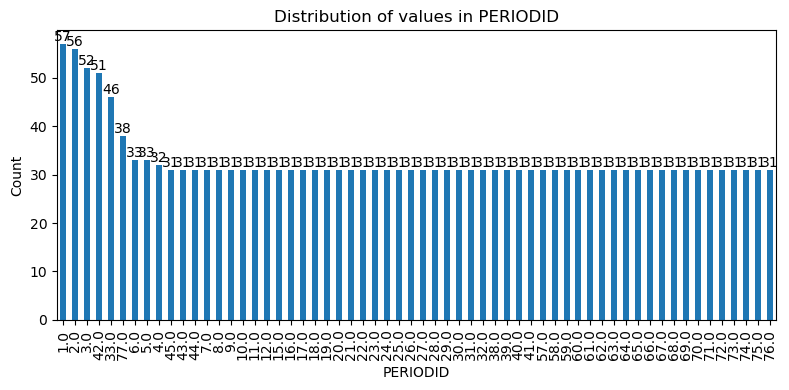

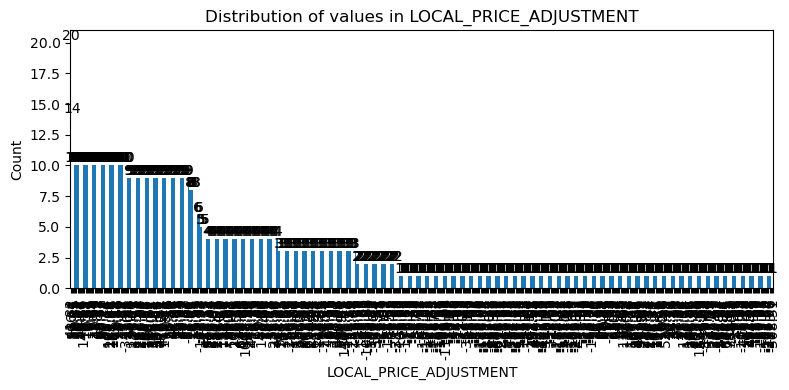

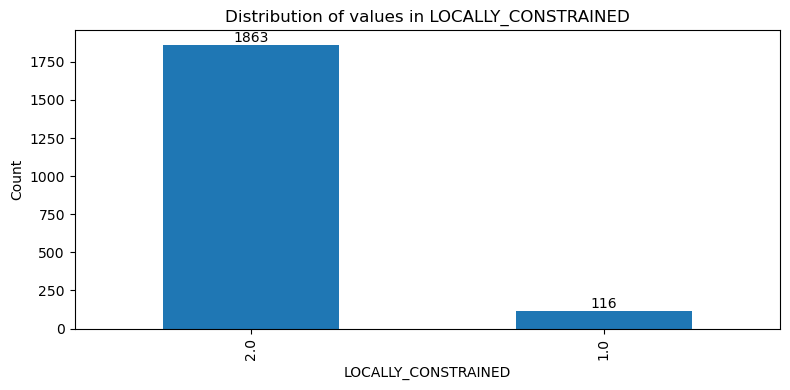

In [60]:
# Plot the distribution of values for a non-numeric column (as a bar chart)
for col in df.select_dtypes(include=['number']).columns:
    value_counts = df[col].value_counts()
    ax = value_counts.plot(kind='bar', figsize=(8, 4))
    plt.title(f'Distribution of values in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Annotate each bar with its count
    for i, count in enumerate(value_counts):
        ax.text(i, count, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [54]:
df[df['I'] == 'C']

,I,PREDISPATCH,LOCAL_PRICE,1,PREDISPATCHSEQNO,DATETIME,DUID,PERIODID,LOCAL_PRICE_ADJUSTMENT,LOCALLY_CONSTRAINED,LASTCHANGED
1979,C,END OF REPORT,65557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_meta = df[df['I'] == 'C']


In [65]:
#remove useless columns 
df = df.drop(columns=['I', 'PREDISPATCH', 'LOCAL_PRICE', '1', 'PREDISPATCHSEQNO', 'LASTCHANGED'])   

KeyError: "['I', 'PREDISPATCH', 'LOCAL_PRICE', '1', 'PREDISPATCHSEQNO'] not found in axis"